In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing as mp

In [2]:
######################################################
########         Define Classes      #################
######################################################
class Car:
    def __init__(self, position, velocity, max_velocity):
        self.position = position
        self.velocity = velocity
        self.max_velocity = max_velocity
        self.laps = 0  # New counter to track laps


    def accelerate(self):
        if self.velocity < self.max_velocity:
            self.velocity += 1

    def decelerate(self):
        if self.velocity > 0:
            self.velocity -= 1

    def move(self, road_length):
        new_position = self.position + self.velocity 
        # Check if the car has completed a lap
        if new_position >= road_length:
            self.laps +=1
        # Update car position, loop around. 
        self.position = new_position % road_length

class TrafficSimulation:
    def __init__(self, road_length, density, max_velocity, slow_down_prob):
        self.road_length = road_length
        self.density = density
        self.max_velocity = max_velocity
        self.slow_down_prob = slow_down_prob
        self.road = [-1] * road_length  # -1 represents an empty cell
        self.cars = []

        self.initialize_road()

    def initialize_road(self):
        num_cars = int(self.density * self.road_length)
        car_positions = random.sample(range(self.road_length), num_cars)

        for position in car_positions:
            velocity = random.randint(0, self.max_velocity)
            self.cars.append(Car(position, velocity, self.max_velocity))
            self.road[position] = velocity

    def update(self):
        for car in self.cars:
            distance_to_next_car = self.distance_to_next_car(car.position) # edit: we moved this line up for acceleration
            
            if distance_to_next_car > car.velocity: # edit: moved this up to implement acceleration before randomisation and added distance condition
                car.accelerate()

            # Check for collisions
            elif car.velocity > distance_to_next_car:  # edit: moved this up to implement deceleration before randomisation
                car.velocity = distance_to_next_car 

            if random.random() < self.slow_down_prob:  # edit: moved this down to implement randomisation after acceleration/deceleration rules
                car.decelerate()

        # Reset road and update with new car positions
        self.road = [-1] * self.road_length
        for car in self.cars:
            car.move(self.road_length)
            self.road[car.position] = car.velocity

    def distance_to_next_car(self, position):
        next_car_position = (position + 1) % self.road_length
        distance = 0

        while self.road[next_car_position] == -1:
            distance += 1
            next_car_position = (next_car_position + 1) % self.road_length

        return distance

    def display(self):
        for cell in self.road:
            if cell == -1:
                print('-', end=' ')
            else:
                print(cell, end=' ')
        print()

    def get_lap_counts(self):
        return [car.laps for car in self.cars]



In [3]:
random.seed(123)
# Example Usageaa
road_length = 70
density = 0.2
max_velocity = 9
slow_down_prob = 0.25

simulation = TrafficSimulation(road_length, density, max_velocity, slow_down_prob)

for _ in range(100):
    simulation.display()
    simulation.update()

lap_counts = simulation.get_lap_counts()
print(f"Lap Counts mean: {sum(lap_counts)}")

- - - 0 2 - 2 - - - - 5 - 3 - - - - - - - 9 - - 0 - - - - - - - - - 2 1 - - - - - - - - - - - - - - - - 8 - 1 - - - - 6 - - - - - 6 - - 5 - 
- 3 - 0 0 - - - - 3 - - 1 - - - - 4 - - - - - 2 - 1 - - - - - - - - 0 - - 2 - - - - - - - - - - - - - - 0 - - - 2 - - - - - - - 5 - - 2 - - 
3 - 1 0 - 1 - - - - 1 - - - 2 - - - - - - - 5 - 1 - - 2 - - - - - - - 1 - - - - 3 - - - - - - - - - - - - 1 - - - - - 3 - - - - - - 2 - - - 
- 1 0 - 1 - - 2 - - - - 2 - - - - 3 - - - - - 1 - 1 - - - 2 - - - - - - 1 - - - - - - - 4 - - - - - - - - - 1 - - - - - - - - 4 - - - - - 3 
1 0 - 1 - 1 - - - - 3 - - - 2 - - - - - - 4 - 0 - - - 2 - - - - 3 - - - - 1 - - - - - - - - - - - 5 - - - - - 1 - - - - - - - - - - - - 5 - 
0 - 1 - 1 - 1 - - - - - 2 - - - - 3 - - - - 1 0 - - - - - - 3 - - - - 3 - - 1 - - - - - - - - - - - - - - - 5 - - 2 - - - - - - - - - - - 1 
- 1 - 1 0 - - - 2 - - - - - 2 - - - - - 3 - 0 - 1 - - - - - - - - - 4 - - 2 - - 2 - - - - - - - - - - - - - - - 2 - - - 3 - - - - - - - - 0 
1 0 - 0 - 1 -

In [4]:
###########################
#### Test one #############
###########################

def sim_range_density_noSlow(density):
    road_length = 100
    max_velocity = 5
    slow_down_prob = 0
    number_of_steps = 100
    simulation = TrafficSimulation(road_length, density, max_velocity, slow_down_prob)
    for _ in range(number_of_steps):
        simulation.update()
    return np.sum(np.array(simulation.get_lap_counts())/number_of_steps)

num_processes = 4
pool = mp.Pool(processes=num_processes)

num = 10
list_density = np.linspace(0,1,num)

results = pool.map(sim_range_density_noSlow, list_density) 
pool.close(); pool.join()


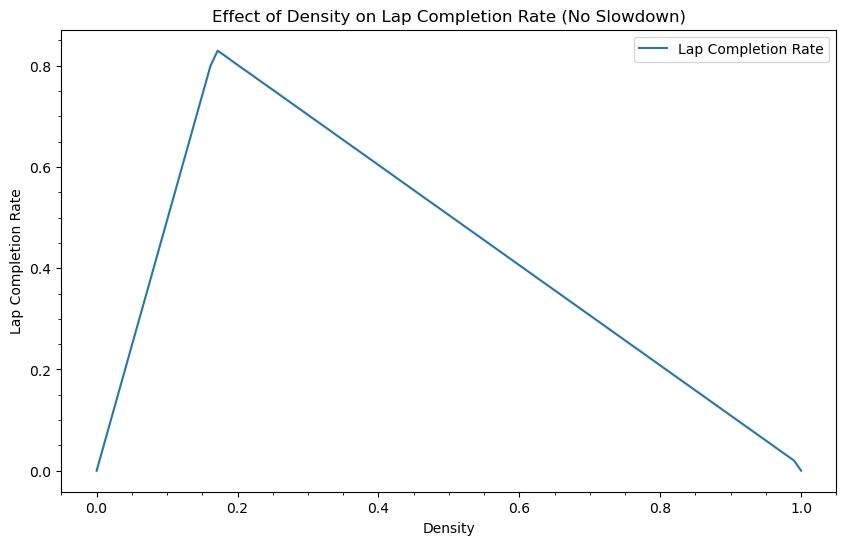

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(list_density, results, label='Lap Completion Rate')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.xlabel('Density')
plt.ylabel('Lap Completion Rate')
plt.title('Effect of Density on Lap Completion Rate (No Slowdown)')
plt.legend()
plt.show()

In [ ]:
def sim_range_density_noSlow(density):
    road_length = 100
    max_velocity = 5
    slow_down_prob = 0
    number_of_steps = 1000
    simulation = TrafficSimulation(road_length, density, max_velocity, slow_down_prob)
    for _ in range(number_of_steps):
        simulation.update()
    return np.sum(np.array(simulation.get_lap_counts())/number_of_steps)
def sim_range_density_Slow1(density):
    road_length = 100
    max_velocity = 5
    slow_down_prob = 0.1
    number_of_steps = 1000
    simulation = TrafficSimulation(road_length, density, max_velocity, slow_down_prob)
    for _ in range(number_of_steps):
        simulation.update()
    return np.sum(np.array(simulation.get_lap_counts())/number_of_steps)
def sim_range_density_Slow2(density):
    road_length = 100
    max_velocity = 5
    slow_down_prob = 0.2
    number_of_steps = 1000
    simulation = TrafficSimulation(road_length, density, max_velocity, slow_down_prob)
    for _ in range(number_of_steps):
        simulation.update()
    return np.sum(np.array(simulation.get_lap_counts())/number_of_steps)
def sim_range_density_Slow3(density):
    road_length = 100
    max_velocity = 5
    slow_down_prob = 0.3
    number_of_steps = 1000
    simulation = TrafficSimulation(road_length, density, max_velocity, slow_down_prob)
    for _ in range(number_of_steps):
        simulation.update()
    return np.sum(np.array(simulation.get_lap_counts())/number_of_steps)



num_processes = 4
pool = mp.Pool(processes=num_processes)
num = 20
list_density = np.linspace(0,1,num)

results_noslow = pool.map(sim_range_density_noSlow, list_density) 
results_slow1 = pool.map(sim_range_density_Slow1, list_density) 
results_slow2 = pool.map(sim_range_density_Slow2, list_density) 
results_slow3 = pool.map(sim_range_density_Slow3, list_density) 
pool.close(); pool.join()


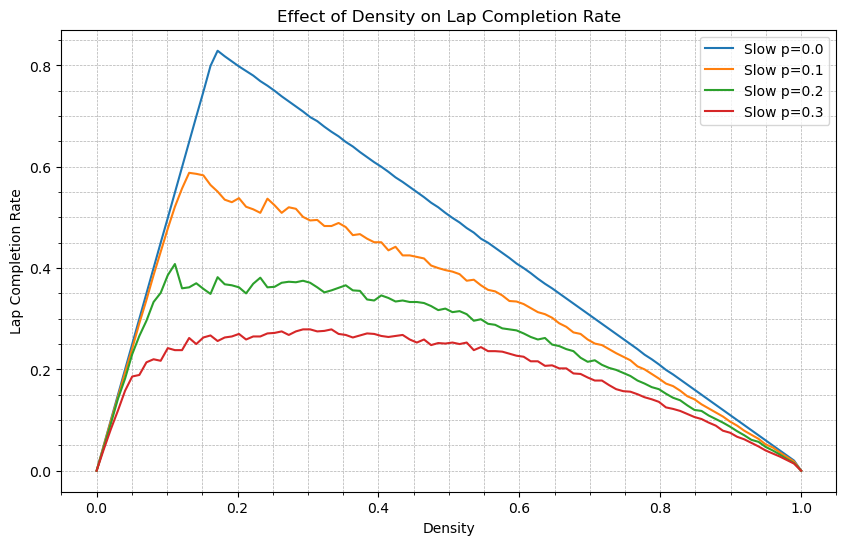

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(list_density, results_noslow, label='Slow p=0.0')
plt.plot(list_density, results_slow1, label='Slow p=0.1')
plt.plot(list_density, results_slow2, label='Slow p=0.2')
plt.plot(list_density, results_slow3, label='Slow p=0.3')

plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.xlabel('Density')
plt.ylabel('Lap Completion Rate')
plt.title('Effect of Density on Lap Completion Rate')
plt.legend()
plt.show()

In [4]:
######################################################
###### Define Classes  (Add trucks/cars) #############
######################################################
class Vehicle:
    def __init__(self, position, velocity, max_velocity):
        self.position = position
        self.velocity = velocity
        self.max_velocity = max_velocity
        self.laps = 0  # New counter to track laps

    def accelerate(self):
        if self.velocity < self.max_velocity:
            self.velocity += 1

    def decelerate(self):
        if self.velocity > 0:
            self.velocity -= 1

    def move(self, road_length):
        new_position = self.position + self.velocity 
        # Check if the car has completed a lap
        if new_position >= road_length:
            self.laps +=1
        # Update car position, loop around. 
        self.position = new_position % road_length

class Car(Vehicle):
    def __init__(self, position, velocity, max_car_velocity):
        super().__init__(position,velocity, max_car_velocity)

class Truck(Vehicle):
    def __init__(self, position, velocity, max_truck_velocity):
        super().__init__(position,velocity, max_truck_velocity)
        

class TrafficSimulation:
    def __init__(self, road_length, density, density_trucks, slow_down_prob):
        self.road_length = road_length
        self.density_total  = density
        self.density_trucks = density *  density_trucks
        self.density_car = density - self.density_trucks

        self.max_truck_velocity = 3  #%#%#%#%#%#%# could this be a variable/input?
        self.max_car_velocity = 5    #%#%#%#%#%#%# same here please  ^^
        self.slow_down_prob = slow_down_prob
        self.road = [-1] * road_length  # -1 represents an empty cell
        self.vehicles = []

        self.initialize_road()

    def initialize_road(self):
        # get number of vehicles 
        num_cars = int(self.density_car * self.road_length)
        num_trucks  = int( self.density_trucks * self.road_length) 
        self.num_cars = num_cars
        self.num_trucks = num_trucks
        vehicle_positions = random.sample(range(self.road_length), num_cars+num_trucks)

        for i,position in enumerate(vehicle_positions):
            if i < num_trucks:
                self.vehicles.append(Truck(position, random.randint(0, self.max_truck_velocity), self.max_truck_velocity))
            else:
                self.vehicles.append(Car(position, random.randint(0,self.max_car_velocity), self.max_car_velocity))
            self.road[position] = self.vehicles[i].velocity 

    def update(self):
        for vehicle in self.vehicles:
            distance_to_next_car = self.distance_to_next_car(vehicle.position)
            
            if distance_to_next_car > vehicle.velocity:
                vehicle.accelerate()

            # Check for collisions
            elif vehicle.velocity > distance_to_next_car:
                vehicle.velocity = distance_to_next_car

            if random.random() < self.slow_down_prob:
                vehicle.decelerate()

        # Reset road and update with new car positions
        self.road = [-1] * self.road_length
        for vehicle in self.vehicles:
            vehicle.move(self.road_length)
            self.road[vehicle.position] = vehicle.velocity

    def distance_to_next_car(self, position):
        next_car_position = (position + 1) % self.road_length
        distance = 0

        while self.road[next_car_position] == -1:
            distance += 1
            next_car_position = (next_car_position + 1) % self.road_length

        return distance

    def display(self):
        for cell in self.road:
            if cell == -1:
                print('-', end=' ')
            else:
                print(cell, end=' ')
        print()

    def get_lap_counts(self):
        return [vehicle.laps for vehicle in self.vehicles]



In [ ]:
# Example Usageaa
road_length = 60
density = 0.4
truck_density = 0.1
max_velocity = 5
slow_down_prob = 0.1

simulation = TrafficSimulation(road_length, density, truck_density, slow_down_prob)
for _ in range(100):
    simulation.display()
    simulation.update()

lap_counts = simulation.get_lap_counts()
print(f"Lap Counts mean: {sum(lap_counts)}, num {simulation.num_cars} {simulation.num_trucks}")

3 - 3 - 3 - 1 - - 1 - - - 4 - - 5 3 - 4 0 4 4 - 0 - 0 2 5 - - - - - - 4 0 - - - 0 - - - - - - - 3 2 - - 1 - - - - - - 5 
- 1 - 1 - 1 - - 2 - - 2 - - - 2 0 - 1 0 0 0 - 1 - 1 0 0 - - - - - 5 - 0 - 1 - - - 1 - - - - - - 0 - 1 - - - 2 - - - - 0 
1 - 1 - 1 - - 2 - - 2 - - - 3 0 - 1 0 0 0 - 1 - 1 0 0 - 1 - - - - - 1 - 1 - - 2 - - - 2 - - - - - 1 - - 2 - - - - 3 - - 
- 1 - 1 - - 2 - - 2 - - - 3 0 - 1 0 0 0 - 1 - 1 0 0 - 1 - - 2 - - - - 1 - - 2 - - - 3 - 1 - - - - - - 2 - - - 3 - - - 2 
1 0 - - - 2 - - 2 - - - 3 0 0 - 0 0 0 - 1 - 1 0 0 - 1 - - 2 - - - 3 - - - 2 - - - 3 - 1 - - 2 - - - - - - - 3 - - 2 - - 
0 - 1 - - - - 2 - - - 3 0 0 - 1 0 0 - 1 - 1 0 0 - 1 - - 2 - - - 3 - - - 3 - - - 3 - 1 - - 2 - - - 3 - - - - - - 2 - - 2 
- 1 - - 2 - - - - - 3 0 0 - 1 0 0 - 1 - 1 0 0 - 1 - - 2 - - - 3 - - - 3 - - - 3 - 1 - - 2 - - - 3 - - - - 4 - - - - 2 0 
1 - - 2 - - - 3 - - 0 0 - 1 0 0 - 1 - 1 0 0 - 1 - - 2 - - - 3 - - - 3 - - - 3 - 1 - - 2 - - - 3 - - - 3 - - - - - 4 0 - 
- - 2 - 1 - - - - 2 0 - 1 0 0 - 

In [ ]:
def sim_range_density_noSlow(density):
    road_length = 1000
    max_velocity = 5
    slow_down_prob = 0
    number_of_steps = 10000
    simulation = TrafficSimulation(road_length, density, max_velocity, slow_down_prob)
    for _ in range(number_of_steps):
        simulation.update()
    return np.sum(np.array(simulation.get_lap_counts())/number_of_steps)
def sim_range_density_Slow1(density):
    road_length = 1000
    max_velocity = 5
    slow_down_prob = 0.1
    number_of_steps = 10000
    simulation = TrafficSimulation(road_length, density, max_velocity, slow_down_prob)
    for _ in range(number_of_steps):
        simulation.update()
    return np.sum(np.array(simulation.get_lap_counts())/number_of_steps)
def sim_range_density_Slow2(density):
    road_length = 1000
    max_velocity = 5
    slow_down_prob = 0.2
    number_of_steps = 10000
    simulation = TrafficSimulation(road_length, density, max_velocity, slow_down_prob)
    for _ in range(number_of_steps):
        simulation.update()
    return np.sum(np.array(simulation.get_lap_counts())/number_of_steps)
def sim_range_density_Slow3(density):
    road_length = 1000
    max_velocity = 5
    slow_down_prob = 0.3
    number_of_steps = 10000
    simulation = TrafficSimulation(road_length, density, max_velocity, slow_down_prob)
    for _ in range(number_of_steps):
        simulation.update()
    return np.sum(np.array(simulation.get_lap_counts())/number_of_steps)



num_processes = 4
pool = mp.Pool(processes=num_processes)
num = 40
truck_density = 0.1
list_density = np.linspace(0,1,num)

results_noslow = pool.map(sim_range_density_noSlow, list_density) 
results_slow1 = pool.map(sim_range_density_Slow1, list_density) 
results_slow2 = pool.map(sim_range_density_Slow2, list_density) 
results_slow3 = pool.map(sim_range_density_Slow3, list_density) 
pool.close(); pool.join()


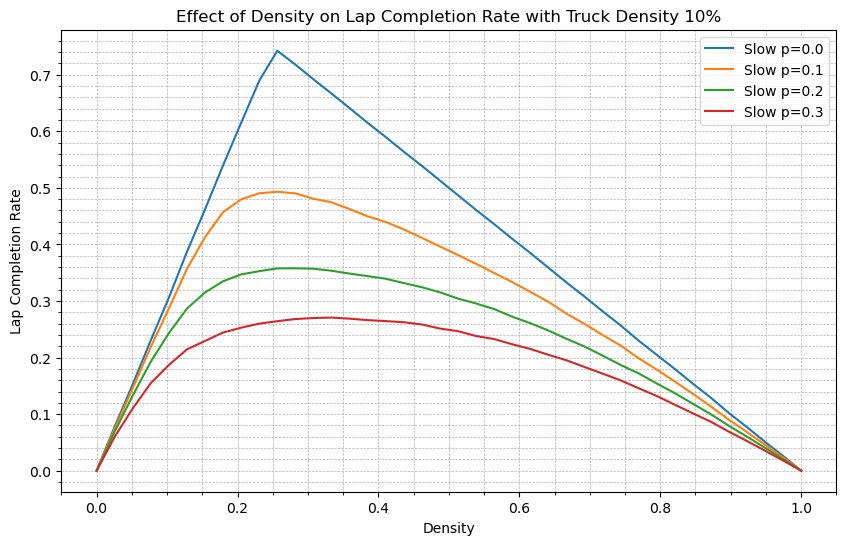

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(list_density, results_noslow, label='Slow p=0.0')
plt.plot(list_density, results_slow1, label='Slow p=0.1')
plt.plot(list_density, results_slow2, label='Slow p=0.2')
plt.plot(list_density, results_slow3, label='Slow p=0.3')

plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.xlabel('Density')
plt.ylabel('Lap Completion Rate')
plt.title('Effect of Density on Lap Completion Rate with Truck Density 10%')
plt.legend()
plt.show()